In [56]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
train=pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samp_sub = pd.read_csv('SampleSubmission.csv')
#test=test.dropna()
test=test.fillna('0')
train.label = train.label.round(1)
train = train[train['label'] != 0.7]
train=train.dropna()
print('the shape of train is {} and the shape of test set is {}'.format(train.shape, test.shape))

the shape of train is (9999, 4) and the shape of test set is (5177, 2)


In [46]:
train.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.0,1.0
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.0,1.0


In [47]:
# Removing mentions and usernames.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

train['tidy_tweet'] = np.vectorize(remove_pattern)(train['safe_text'], "@[ \w]*") 

test['tidy_tweet'] = np.vectorize(remove_pattern)(test['safe_text'], "@[ \w]*") 

In [48]:
train.head()

,tweet_id,safe_text,label,agreement,tidy_tweet
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.0,1.0,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE . <url>
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.0,1.0,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.0,1.0,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD"
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.0,1.0,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that"
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.0,1.0,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>


## Feature engineering

In [49]:
# creating body length and puntuation percentage features.
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
train['body_len'] = train['safe_text'].apply(lambda x: len(x) - x.count(" "))
train['punct%'] = train['safe_text'].apply(lambda x: count_punct(x))

test['body_len'] = test['safe_text'].apply(lambda x: len(x) - x.count(" "))
test['punct%'] = test['safe_text'].apply(lambda x: count_punct(x))



In [50]:
train.head()

,tweet_id,safe_text,label,agreement,tidy_tweet,body_len,punct%
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE @ Stegman St. <url>,0.0,1.0,Me &amp; The Big Homie meanboy3000 #MEANBOY #MB #MBS #MMR #STEGMANLIFE . <url>,76,14.5
1,E3303EME,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,1.0,1.0,I'm 100% thinking of devoting my career to proving autism isn't caused by vaccines due to the IDIOTIC posts I've seen about World Autism Day,116,3.4
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",-1.0,1.0,"#whatcausesautism VACCINES, DO NOT VACCINATE YOUR CHILD",49,4.1
3,1DR6ROZ4,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",-1.0,1.0,"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that",111,3.6
4,J77ENIIE,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,0.0,1.0,Thanks to <user> Catch me performing at La Nuit NYC 1134 1st ave. Show starts at 6! #jennifair #mmr… <url>,87,9.2


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


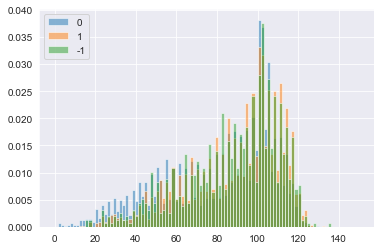

In [57]:
import matplotlib.pyplot as plt
import numpy as np
bins = np.linspace(0,150,100)

plt.hist(train[train['label']==0.0]['body_len'], bins, alpha=0.5, normed=True, label='0')
plt.hist(train[train['label']==1.0]['body_len'], bins, alpha=0.5, normed=True, label='1')
plt.hist(train[train['label']==-1.0]['body_len'], bins, alpha=0.5, normed=True, label='-1')
plt.legend(loc='upper left')
plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


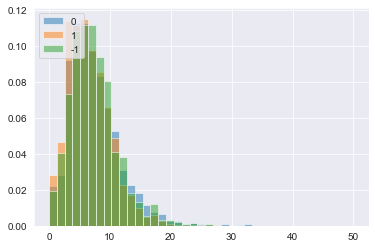

In [58]:
bins = np.linspace(0,50,40)
plt.hist(train[train['label']==0.0]['punct%'], bins, alpha=0.5, normed=True, label='0')
plt.hist(train[train['label']==1.0]['punct%'], bins, alpha=0.5, normed=True, label='1')
plt.hist(train[train['label']==-1.0]['punct%'], bins, alpha=0.5, normed=True, label='-1')
plt.legend(loc='upper left')
plt.show()

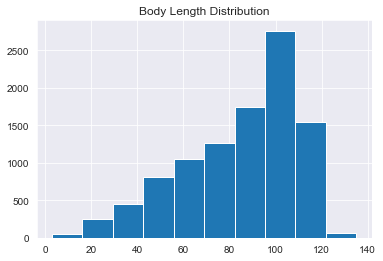

In [59]:
plt.hist(train['body_len'])
plt.title("Body Length Distribution")
plt.show()

## Removing stopwords and Lemmatization

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
text = train.tidy_tweet[3]
text

"I mean if they immunize my kid with something that won't secretly kill him years down the line then I'm all for it, but I don't trust that"

In [26]:
text = "".join([word for word in text if word not in string.punctuation])
text = text.lower()
text

'i mean if they immunize my kid with something that wont secretly kill him years down the line then im all for it but i dont trust that'

In [27]:
tokens = re.split('\W+', text)
tokens

['i',
 'mean',
 'if',
 'they',
 'immunize',
 'my',
 'kid',
 'with',
 'something',
 'that',
 'wont',
 'secretly',
 'kill',
 'him',
 'years',
 'down',
 'the',
 'line',
 'then',
 'im',
 'all',
 'for',
 'it',
 'but',
 'i',
 'dont',
 'trust',
 'that']

In [28]:
text = [word for word in tokens if word not in stopwords]
text

['mean',
 'immunize',
 'kid',
 'something',
 'wont',
 'secretly',
 'kill',
 'years',
 'line',
 'im',
 'dont',
 'trust']

In [29]:
[wn.lemmatize(word) for word in text]

['mean',
 'immunize',
 'kid',
 'something',
 'wont',
 'secretly',
 'kill',
 'year',
 'line',
 'im',
 'dont',
 'trust']

In [30]:
from nltk.stem import PorterStemmer
stem = PorterStemmer()
[stem.stem(word) for word in text]

['mean',
 'immun',
 'kid',
 'someth',
 'wont',
 'secretli',
 'kill',
 'year',
 'line',
 'im',
 'dont',
 'trust']

In [32]:
# Applying all the above into a neat function
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    text = text.lower()
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text]
    return text
# combi['cleaned_tweet'] = combi['tidy_tweet'].apply(lambda x: clean_text(x.lower()))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## TFiDF

* TF-IDF is an information retrieval and information extraction subtask which aims to express the importance of a word to a document which is part of a colection of documents which we usually name a corpus.
* a word that frequently appears in a document has more relevancy for that document, meaning that there is higher probability that the document is about or in relation to that specific word
* a word that frequently appears in more documents may prevent us from finding the right document in a collection; the word is relevant either for all documents or for none. Either way, it will not help us filter out a single document or a small subset of documents from the whole set.

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tf_idf_fit = tfidf_vect.fit(train['tidy_tweet'])

tfidf_train = tf_idf_fit.transform(train['tidy_tweet'])
tfidf_test = tf_idf_fit.transform(test['tidy_tweet'])

train_vect = pd.concat([train[['body_len', 'punct%', 'label']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
test_vect = pd.concat([test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

train_vect.head()

,body_len,punct%,label,0,1,2,3,4,5,6,...,17244,17245,17246,17247,17248,17249,17250,17251,17252,17253
0,76,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,116,3.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,3.6,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
train_vect.shape, test_vect.shape

((9999, 17257), (5177, 17256))

In [34]:
train.isnull().sum()

tweet_id      0
safe_text     0
label         0
agreement     0
tidy_tweet    0
body_len      0
punct%        0
dtype: int64

In [39]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, accuracy_score
from lightgbm import LGBMRegressor, LGBMClassifier


## defining the metric


train = train_vect.drop('label', 1)
test = test_vect
target = train_vect.label
kf = KFold(n_splits=4,shuffle=False)
lgbm = LGBMClassifier(random_state=2020, verbose=1)
scores = []
pred_test = np.zeros(len(test))
for (train_index,test_index) in kf.split(train,target):
    X_train,X_test = train.iloc[train_index],train.iloc[test_index]
    y_train,y_test = target.iloc[train_index],target.iloc[test_index]
    lgbm.fit(X_train,y_train,early_stopping_rounds=500,eval_set=[(X_test,y_test)])
    scores.append(accuracy_score(lgbm.predict(X_test),y_test))
    pred_test+=lgbm.predict(test)

[1]	valid_0's multi_logloss: 0.915178
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's multi_logloss: 0.886126
[3]	valid_0's multi_logloss: 0.861163
[4]	valid_0's multi_logloss: 0.840197
[5]	valid_0's multi_logloss: 0.822311
[6]	valid_0's multi_logloss: 0.80702
[7]	valid_0's multi_logloss: 0.794286
[8]	valid_0's multi_logloss: 0.783128
[9]	valid_0's multi_logloss: 0.77276
[10]	valid_0's multi_logloss: 0.763621
[11]	valid_0's multi_logloss: 0.755815
[12]	valid_0's multi_logloss: 0.749047
[13]	valid_0's multi_logloss: 0.742821
[14]	valid_0's multi_logloss: 0.737082
[15]	valid_0's multi_logloss: 0.731372
[16]	valid_0's multi_logloss: 0.726548
[17]	valid_0's multi_logloss: 0.721702
[18]	valid_0's multi_logloss: 0.717827
[19]	valid_0's multi_logloss: 0.713965
[20]	valid_0's multi_logloss: 0.709667
[21]	valid_0's multi_logloss: 0.706783
[22]	valid_0's multi_logloss: 0.703695
[23]	valid_0's multi_logloss: 0.700749
[24]	valid_0's multi_logloss: 0.697741
[25]	valid_0

[3]	valid_0's multi_logloss: 0.873682
[4]	valid_0's multi_logloss: 0.85235
[5]	valid_0's multi_logloss: 0.834555
[6]	valid_0's multi_logloss: 0.818579
[7]	valid_0's multi_logloss: 0.804688
[8]	valid_0's multi_logloss: 0.792999
[9]	valid_0's multi_logloss: 0.782793
[10]	valid_0's multi_logloss: 0.773764
[11]	valid_0's multi_logloss: 0.765344
[12]	valid_0's multi_logloss: 0.757962
[13]	valid_0's multi_logloss: 0.750255
[14]	valid_0's multi_logloss: 0.743524
[15]	valid_0's multi_logloss: 0.737332
[16]	valid_0's multi_logloss: 0.732039
[17]	valid_0's multi_logloss: 0.72744
[18]	valid_0's multi_logloss: 0.723483
[19]	valid_0's multi_logloss: 0.719679
[20]	valid_0's multi_logloss: 0.716478
[21]	valid_0's multi_logloss: 0.713307
[22]	valid_0's multi_logloss: 0.71024
[23]	valid_0's multi_logloss: 0.707062
[24]	valid_0's multi_logloss: 0.704489
[25]	valid_0's multi_logloss: 0.701629
[26]	valid_0's multi_logloss: 0.69901
[27]	valid_0's multi_logloss: 0.696903
[28]	valid_0's multi_logloss: 0.6944

In [40]:
scores

[0.7152, 0.7348, 0.7324, 0.7202881152460985]

In [120]:
final1 = np.clip(pred_test/4, a_min=-1.0, a_max=1)

samp_sub.to_csv('baseline_4.csv', index=False)

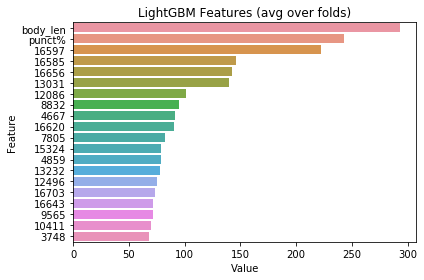

In [42]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,train.columns),reverse=True), columns=['Value','Feature'])
feature_imp = feature_imp.head(20)
# plt.figure(figsize=(30, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [ ]:
# Lemat